In [ ]:
!python -m spacy download en_core_web_sm

2023-08-29 14:02:24.941885: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 14:02:26.073318: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 29.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import pandas as pd
import seaborn as sns
import string
import numpy as np
import spacy
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data=pd.read_csv("/content/sample_data/tweet.csv")
data.head()

tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative

In [ ]:
data.describe()

tweets       class
count                                               81408       81408
unique                                              67997           4
top     $$$=&gt;&gt; #peace #love #freedom\n#fight for...  figurative
freq                                                   14       21238

# **we can see we have @81408 tweet out of which @67997 are unique and also we have 4 class**

In [ ]:
len(data[data.tweets.duplicated()])

13411

In [ ]:
duplicate_tweet=data[data.tweets.duplicated()]
duplicate_tweet.head()

tweets       class
12617                                             #Irony  figurative
17820                                             #irony  figurative
21104                                           #sarcasm  figurative
21238  Fav moment in Sepp Blatter vid (0:20): "We hav...       irony
21239  Just found this while walking my human.... #ir...       irony

In [ ]:
duplicate_tweet.to_csv("dup_tweet.csv")

In [ ]:
duplicate_tweet['class'].value_counts()

irony         8105
sarcasm       5277
regular         26
figurative       3
Name: class, dtype: int64

In [ ]:
data['class'].value_counts()

figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: class, dtype: int64

In [ ]:
data1=data.drop(duplicate_tweet.index)
data1=data1.reset_index()


In [ ]:
data1.drop('index',axis=1,inplace=True)

In [ ]:
data1.head()

tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative

In [ ]:
#i have dropped all non uniqu tweets
data1.describe()

tweets       class
count                                               67997       67997
unique                                              67997           4
top     Be aware  dirty step to get money  #staylight ...  figurative
freq                                                    1       21235

In [ ]:
data1[data1.duplicated]

Empty DataFrame
Columns: [tweets, class]
Index: []

<Axes: >

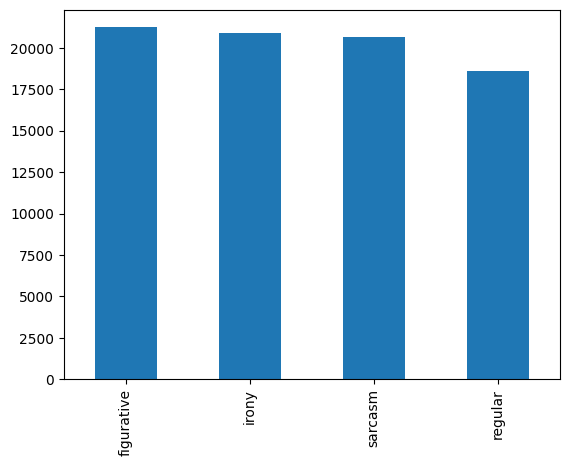

In [ ]:
data['class'].value_counts().plot(kind='bar')

In [ ]:
data1['class'].value_counts()

figurative    21235
regular       18569
sarcasm       15404
irony         12789
Name: class, dtype: int64

<Axes: >

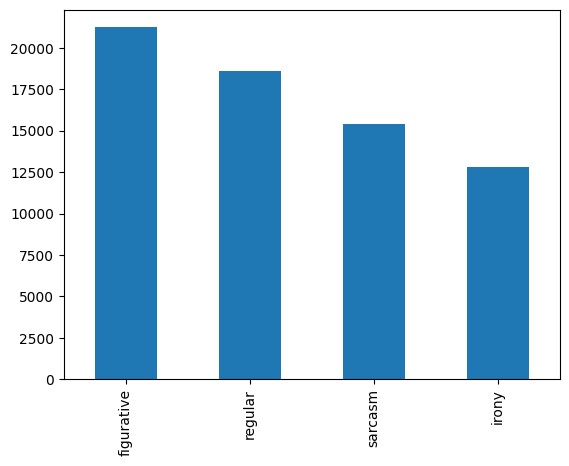

In [ ]:
data1['class'].value_counts().plot(kind='bar')

In [ ]:
data1.shape

(67997, 2)

In [ ]:
#removing the punctation
pun=string.punctuation
pun

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
type(pun)

str

In [ ]:
pun

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import re
def remove_pattern(text,exp):
  r=re.findall(exp,text)
  for i in r:
    text=re.sub(re.escape(i),"",text)
  return text

In [ ]:
#removal of @
data1['clean_tweets']=np.vectorize(remove_pattern)(data1['tweets'],"@[\w]*")

In [ ]:
#removal of Https
data1['clean_tweets']=np.vectorize(remove_pattern)(data1['clean_tweets'],"https[\S]*")
data1['clean_tweets']=np.vectorize(remove_pattern)(data1['clean_tweets'],"http[\S]*")

In [ ]:
#removal of #
data1['clean_tweets']=np.vectorize(remove_pattern)(data1['clean_tweets'],"#")


In [ ]:
data1.head()

tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                        clean_tweets  
0  Be aware  dirty step to get money  staylight s...  
1  sarcasm for people who don't understand diy ar...  
2    DailyMail readers being sensible as always s...  
3   Why do I get the feeling you like games? sarcasm  
4    -  You probably just missed the text. sarcastic

In [ ]:
#data1['clean_tweets']=([char for char in data1['clean_tweets'] if char not in string.punctuation]).''.join(char)

In [ ]:
for i in range(0,len(data1['clean_tweets'])):
  text=data1['clean_tweets'][i]
  no_pun=[char for char in text if char not in pun]
  no_pun=''.join(no_pun)
  data1['clean_tweets'][i]=no_pun

data1.head()


tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                        clean_tweets  
0  Be aware  dirty step to get money  staylight s...  
1  sarcasm for people who dont understand diy art...  
2    DailyMail readers being sensible as always s...  
3    Why do I get the feeling you like games sarcasm  
4        You probably just missed the text sarcastic

In [ ]:
# remove both the leading and the trailing characters
data1['clean_tweets']=[x.strip() for x in data1.clean_tweets]
#data1['clean_tweets']=[x for x in data1.clean_tweets if x]
data1.head()


tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                        clean_tweets  
0  Be aware  dirty step to get money  staylight s...  
1  sarcasm for people who dont understand diy art...  
2  DailyMail readers being sensible as always sho...  
3    Why do I get the feeling you like games sarcasm  
4        You probably just missed the text sarcastic

In [ ]:
#data1.to_csv("shub.csv")

In [ ]:
data1.shape

(67997, 3)

In [ ]:
#lets count the length of tweet old nad cleaned
data1['clean_twt_len']=[len(x.split(" ")) for x in data1.tweets]
data1.head()

tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                        clean_tweets  clean_twt_len  
0  Be aware  dirty step to get money  staylight s...             16  
1  sarcasm for people who dont understand diy art...              9  
2  DailyMail readers being sensible as always sho...             13  
3    Why do I get the feeling you like games sarcasm             11  
4        You probably just missed the text sarcastic              9

In [ ]:
data1['clean_tweets'] =data1['clean_tweets'] .apply(lambda x: " ".join(x.split()))

In [ ]:
#tokenize
data1['word_token']=" "
for i in range(0,len(data1['clean_tweets'])):
  text=data1['clean_tweets'][i]
  data1['word_token'][i]=word_tokenize(text)


data1.head()



<ipython-input-35-3d75c20af3dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['word_token'][i]=word_tokenize(text)


tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                        clean_tweets  clean_twt_len  \
0  Be aware dirty step to get money staylight sta...             16   
1  sarcasm for people who dont understand diy art...              9   
2  DailyMail readers being sensible as always sho...             13   
3    Why do I get the feeling you like games sarcasm             11   
4        You probably just missed the text sarcastic              9   

                                          word_token  
0  [Be, aware, dirty, step, to, get, money, stayl...  
1  [sarcasm, for, people, who, dont, understand, ...  
2  [DailyMail, readers, being, sensible, as, alwa...  
3  [Why, do, I, get, the, feeling, you, like, gam...  
4  [You, probably, just, missed, the, text, sarca...

In [ ]:
data1.head()

tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                        clean_tweets  clean_twt_len  \
0  Be aware dirty step to get money staylight sta...             16   
1  sarcasm for people who dont understand diy art...              9   
2  DailyMail readers being sensible as always sho...             13   
3    Why do I get the feeling you like games sarcasm             11   
4        You probably just missed the text sarcastic              9   

                                          word_token  
0  [Be, aware, dirty, step, to, get, money, stayl...  
1  [sarcasm, for, people, who, dont, understand, ...  
2  [DailyMail, readers, being, sensible, as, alwa...  
3  [Why, do, I, get, the, feeling, you, like, gam...  
4  [You, probably, just, missed, the, text, sarca...

In [ ]:
#lower case and lematization
for i in range(0,len(data1['clean_tweets'])):
  txt=data1['clean_tweets'][i]
  txt=txt.lower()
  data1['clean_tweets'][i]=txt
data1['word_token']=data1['word_token'].apply(lambda x: [word.lower() for word in x])
data1.head()

<ipython-input-37-fd6aa80186b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['clean_tweets'][i]=txt


tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                        clean_tweets  clean_twt_len  \
0  be aware dirty step to get money staylight sta...             16   
1  sarcasm for people who dont understand diy art...              9   
2  dailymail readers being sensible as always sho...             13   
3    why do i get the feeling you like games sarcasm             11   
4        you probably just missed the text sarcastic              9   

                                          word_token  
0  [be, aware, dirty, step, to, get, money, stayl...  
1  [sarcasm, for, people, who, dont, understand, ...  
2  [dailymail, readers, being, sensible, as, alwa...  
3  [why, do, i, get, the, feeling, you, like, gam...  
4  [you, probably, just, missed, the, text, sarca...

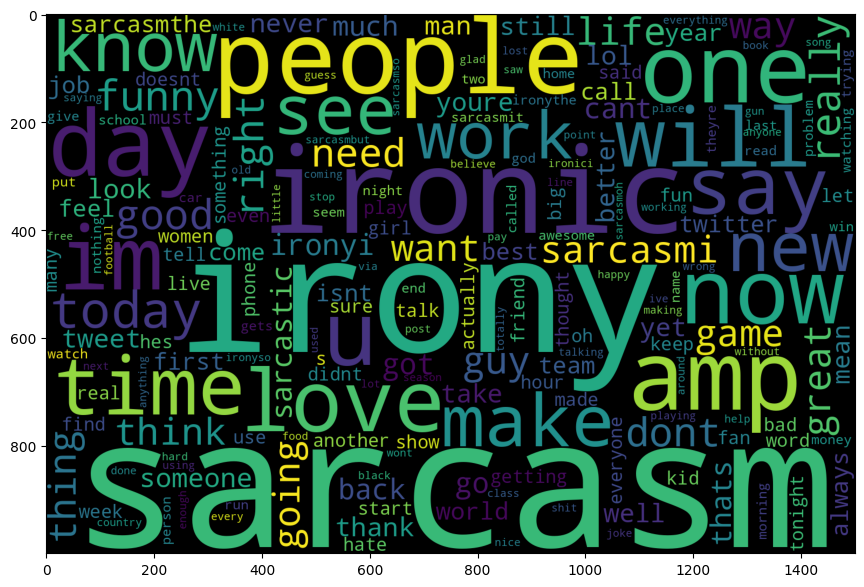

In [ ]:
#lets do wordcloud
all_tweet=''.join(data1['clean_tweets'][data1['class']=='figurative'])
plt.figure(figsize=(12,7))
word_cloud=WordCloud(width=1500,height=1000).generate(all_tweet)
plt.imshow(word_cloud)
plt.show()

In [ ]:
#lets see frequency of word in class figurative
word_freq=pd.Series(''.join(data1['clean_tweets'][data1['class']=='figurative']).split()).value_counts()[0:50]
word_freq_df=pd.DataFrame({'word':word_freq.index,'frequency':word_freq.values})
word_freq_df.head(10)
#it is found that rather than actual word most of them are stop words

word  frequency
0      the       9097
1       to       6874
2        a       6222
3       of       3997
4       is       3913
5       in       3474
6        i       3417
7      and       3310
8  sarcasm       3265
9      for       2928

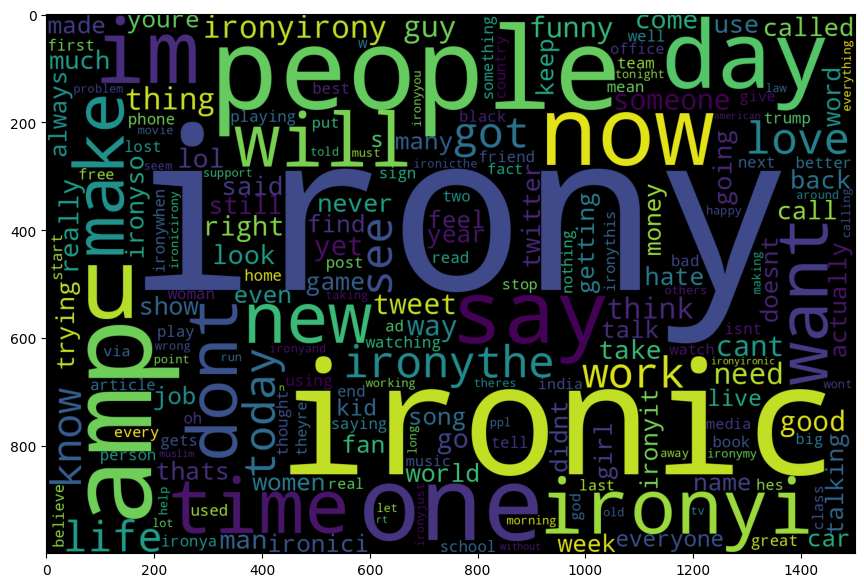

In [ ]:
all_tweet=''.join(data1['clean_tweets'][data1['class']=='irony'])
plt.figure(figsize=(12,7))
word_cloud=WordCloud(width=1500,height=1000).generate(all_tweet)
plt.imshow(word_cloud)
plt.show()

In [ ]:
#lets see frequency of word in class irony
word_freq=pd.Series(''.join(data1['clean_tweets'][data1['class']=='irony']).split()).value_counts()[0:50]
word_freq_df=pd.DataFrame({'word':word_freq.index,'frequency':word_freq.values})
word_freq_df.head(10)
#it is found that rather than actual word most of them are stop words

word  frequency
0    the       6104
1     to       4474
2      a       4111
3  irony       3205
4     of       2821
5     is       2474
6     in       2444
7    and       2240
8     on       1969
9      i       1841

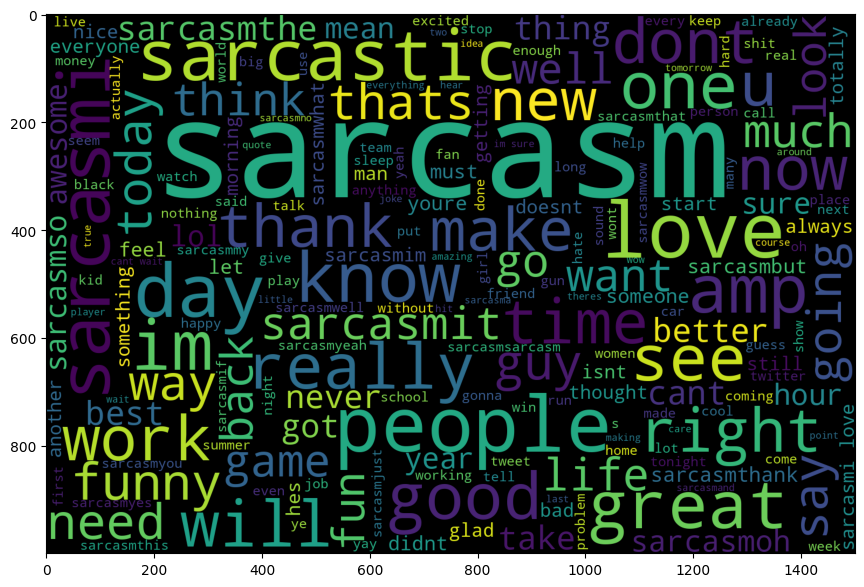

In [ ]:
all_tweet=''.join(data1['clean_tweets'][data1['class']=='sarcasm'])
plt.figure(figsize=(12,7))
word_cloud=WordCloud(width=1500,height=1000).generate(all_tweet)
plt.imshow(word_cloud)
plt.show()

In [ ]:
#lets see frequency of word in class sarcasm
word_freq=pd.Series(''.join(data1['clean_tweets'][data1['class']=='sarcasm']).split()).value_counts()[0:50]
word_freq_df=pd.DataFrame({'word':word_freq.index,'frequency':word_freq.values})
word_freq_df.head(10)
#it is found that rather than actual word most of them are stop words

word  frequency
0      the       5698
1  sarcasm       4781
2       to       4641
3        a       4027
4        i       2661
5       is       2595
6       of       2378
7      and       2210
8      for       2153
9      you       2123

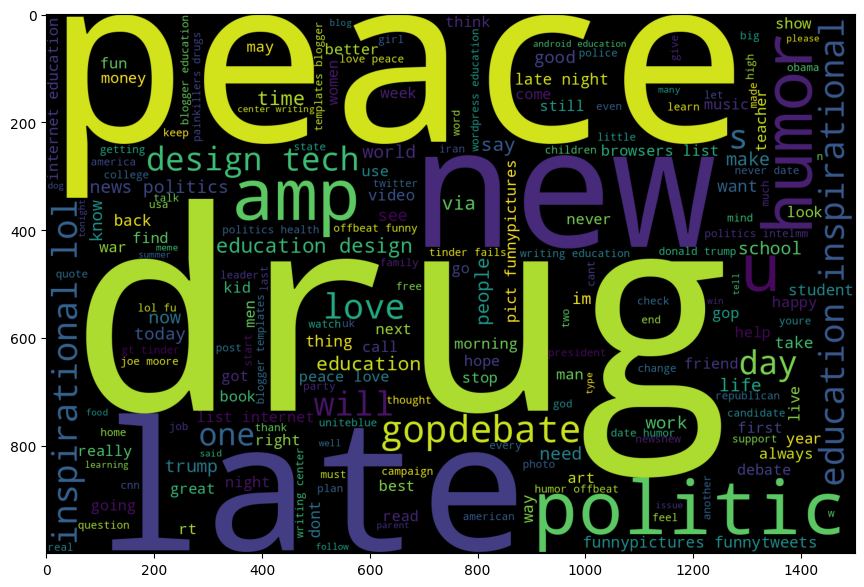

In [ ]:
all_tweet=''.join(data1['clean_tweets'][data1['class']=='regular'])
plt.figure(figsize=(12,7))
word_cloud=WordCloud(width=1500,height=1000).generate(all_tweet)
plt.imshow(word_cloud)
plt.show()

In [ ]:
#lets see frequency of word in class regular
word_freq=pd.Series(''.join(data1['clean_tweets'][data1['class']=='regular']).split()).value_counts()[0:50]
word_freq_df=pd.DataFrame({'word':word_freq.index,'frequency':word_freq.values})
word_freq_df.head(10)
#it is found that rather than actual word most of them are stop words

word  frequency
0        the       4910
1         to       4313
2         of       3074
3          a       2939
4         in       2754
5        for       2329
6        and       2285
7      peace       2093
8         is       2091
9  education       2048

In [ ]:
data1.head()

tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                        clean_tweets  clean_twt_len  \
0  be aware dirty step to get money staylight sta...             16   
1  sarcasm for people who dont understand diy art...              9   
2  dailymail readers being sensible as always sho...             13   
3    why do i get the feeling you like games sarcasm             11   
4        you probably just missed the text sarcastic              9   

                                          word_token  
0  [be, aware, dirty, step, to, get, money, stayl...  
1  [sarcasm, for, people, who, dont, understand, ...  
2  [dailymail, readers, being, sensible, as, alwa...  
3  [why, do, i, get, the, feeling, you, like, gam...  
4  [you, probably, just, missed, the, text, sarca...

In [ ]:
#lets try now by removing stop word and lematization
my_stop_word=nltk.corpus.stopwords.words('english')
my_stop_word.append('m')
my_stop_word.append('s')
for i in range(0,len(data1['clean_tweets'])):
  text_tokens=(data1['clean_tweets'][i]).split(" ")
  #print(text_tokens)
  txt=[word for word in text_tokens if not word in my_stop_word]

  #remove_stopwords(text_tokens)
        #word for word in text_tokens if not word in my_stop_words
  txt=' '.join(txt)
  #print(txt)
  #txt=re.sub(' +', ' ', txt)#removing extra space in line
  data1['clean_tweets'][i]=txt
data1.head()


<ipython-input-47-02faaa4a55c6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['clean_tweets'][i]=txt


tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                        clean_tweets  clean_twt_len  \
0  aware dirty step get money staylight staywhite...             16   
1       sarcasm people dont understand diy artattack              9   
2  dailymail readers sensible always shocker sarc...             13   
3                     get feeling like games sarcasm             11   
4                     probably missed text sarcastic              9   

                                          word_token  
0  [be, aware, dirty, step, to, get, money, stayl...  
1  [sarcasm, for, people, who, dont, understand, ...  
2  [dailymail, readers, being, sensible, as, alwa...  
3  [why, do, i, get, the, feeling, you, like, gam...  
4  [you, probably, just, missed, the, text, sarca...

In [ ]:
#lemmatization
nlp=spacy.load('en_core_web_sm')
lem=WordNetLemmatizer()
my_stop_word=stopwords.words('english')
#data1['clean_tweets']=data1['clean_tweets'].apply(lambda x: [word for word in x if not word in my_stop_word])
for i in range(0,len(data1['clean_tweets'])):
  text_tokens=(data1['clean_tweets'][i]).split(" ")
  #print(text_tokens)
  doc=nlp(' '.join(text_tokens))
  txt=[token.lemma_ for token in doc]
        #word for word in text_tokens if not word in my_stop_words
  #print(txt)
  data1['clean_tweets'][i]=' '.join(txt)
  #txt=re.sub('…', '', txt)
  #print(txt)
  #data1['clean_tweets'][i]=txt
data1.head()


<ipython-input-48-a2c3b20badd8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['clean_tweets'][i]=' '.join(txt)


tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                        clean_tweets  clean_twt_len  \
0  aware dirty step get money staylight staywhite...             16   
1     sarcasm people do not understand diy artattack              9   
2  dailymail reader sensible always shock sarcast...             13   
3                         get feel like game sarcasm             11   
4                       probably miss text sarcastic              9   

                                          word_token  
0  [be, aware, dirty, step, to, get, money, stayl...  
1  [sarcasm, for, people, who, dont, understand, ...  
2  [dailymail, readers, being, sensible, as, alwa...  
3  [why, do, i, get, the, feeling, you, like, gam...  
4  [you, probably, just, missed, the, text, sarca...

In [ ]:
#word length after lemmatization
data1['lema_twt_len']=[len(x.split(" ")) for x in data1.clean_tweets]
data1.head()

tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                        clean_tweets  clean_twt_len  \
0  aware dirty step get money staylight staywhite...             16   
1     sarcasm people do not understand diy artattack              9   
2  dailymail reader sensible always shock sarcast...             13   
3                         get feel like game sarcasm             11   
4                       probably miss text sarcastic              9   

                                          word_token  lema_twt_len  
0  [be, aware, dirty, step, to, get, money, stayl...            10  
1  [sarcasm, for, people, who, dont, understand, ...             7  
2  [dailymail, readers, being, sensible, as, alwa...             9  
3  [why, do, i, get, the, feeling, you, like, gam...             5  
4  [you, probably, just, missed, the, text, sarca...             4

figurative


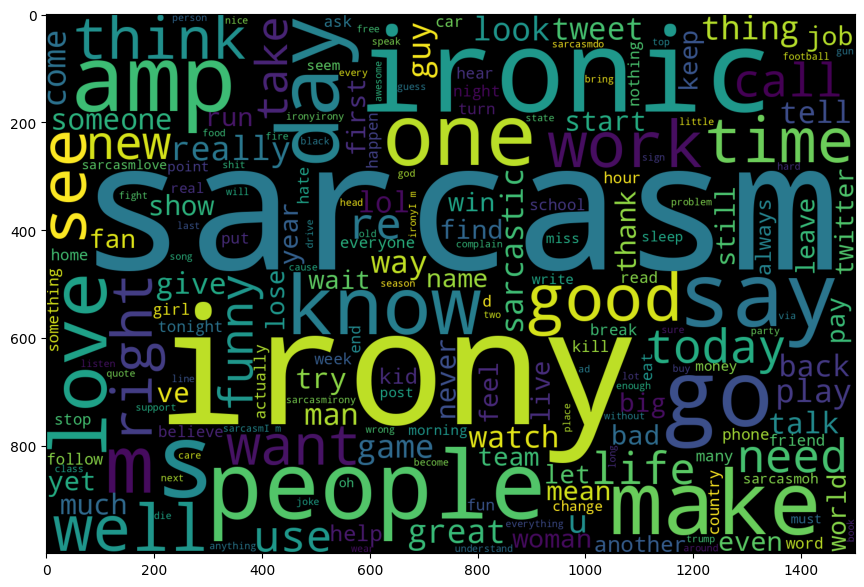

In [ ]:
#word cloud and word freq vizualization
all_tweet=''.join(data1['clean_tweets'][data1['class']=='figurative'])
plt.figure(figsize=(12,7))
word_cloud=WordCloud(width=1500,height=1000).generate(all_tweet)
plt.imshow(word_cloud)
plt.show()

In [ ]:
word_freq1=pd.Series(''.join(data1['clean_tweets'][data1['class']=='figurative']).split()).value_counts()[0:50]
word_freq_df=pd.DataFrame({'word':word_freq1.index,'frequency':word_freq1.values})
word_freq_df.head(10)

word  frequency
0  sarcasm       3234
1      not       2876
2    irony       2460
3      get       1295
4       do       1208
5        m       1086
6   ironic       1063
7        s        967
8       go        935
9     like        919

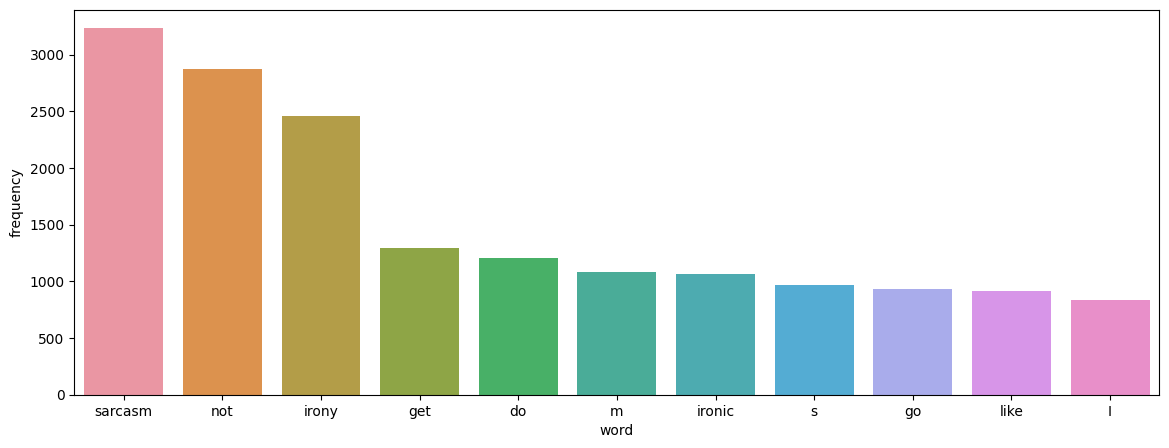

In [ ]:
temp=word_freq_df.head(11)
plt.figure(figsize=(14,5))
#temp= temp.to_frame().reset_index()
sns.barplot(x="word",y="frequency", data = temp)
plt.show()

irony

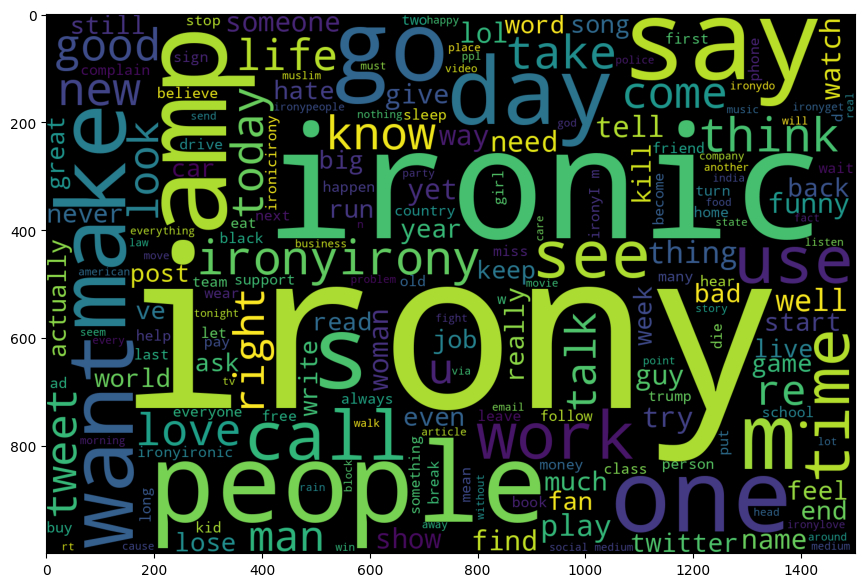

In [ ]:
all_tweet=''.join(data1['clean_tweets'][data1['class']=='irony'])
plt.figure(figsize=(12,7))
word_cloud=WordCloud(width=1500,height=1000).generate(all_tweet)
plt.imshow(word_cloud)
plt.show()

In [ ]:
word_freq1=pd.Series(''.join(data1['clean_tweets'][data1['class']=='irony']).split()).value_counts()[0:50]
word_freq_df=pd.DataFrame({'word':word_freq1.index,'frequency':word_freq1.values})
word_freq_df.head(10)

word  frequency
0   irony       3072
1     not       1544
2  ironic       1177
3     get        726
4      do        637
5     amp        615
6  people        574
7     say        554
8       m        524
9      go        483

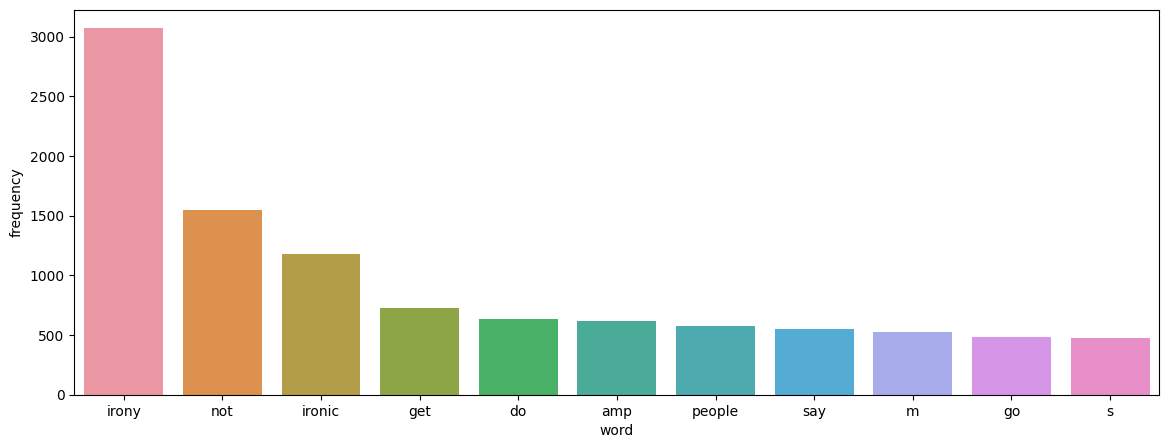

In [ ]:
temp=word_freq_df.head(11)
plt.figure(figsize=(14,5))
#temp= temp.to_frame().reset_index()
sns.barplot(x="word",y="frequency", data = temp)
plt.show()

sarcasm

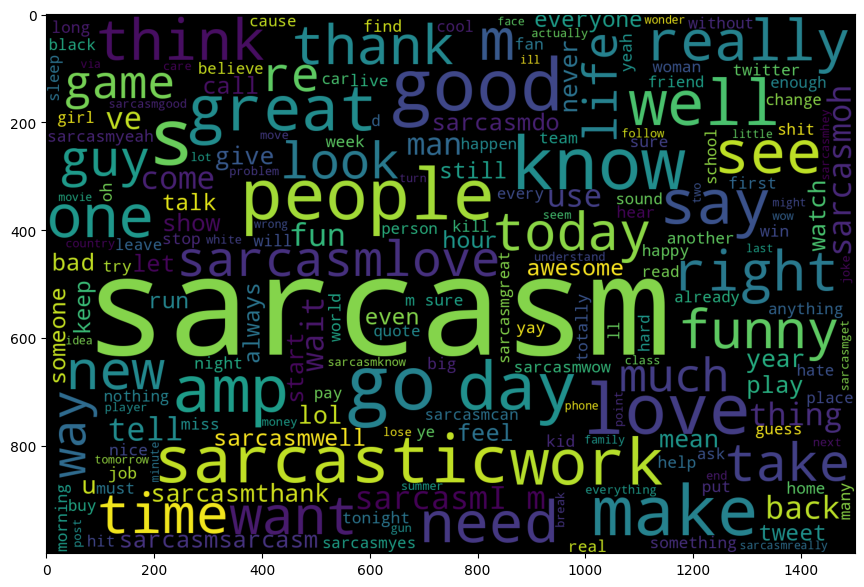

In [ ]:
all_tweet=''.join(data1['clean_tweets'][data1['class']=='sarcasm'])
plt.figure(figsize=(12,7))
word_cloud=WordCloud(width=1500,height=1000).generate(all_tweet)
plt.imshow(word_cloud)
plt.show()

In [ ]:
word_freq1=pd.Series(''.join(data1['clean_tweets'][data1['class']=='sarcasm']).split()).value_counts()[0:50]
word_freq_df=pd.DataFrame({'word':word_freq1.index,'frequency':word_freq1.values})
word_freq_df.head(10)

word  frequency
0  sarcasm       4719
1      not       2241
2      get        978
3       do        934
4        m        914
5        s        873
6     like        780
7       go        744
8        I        687
9     good        686

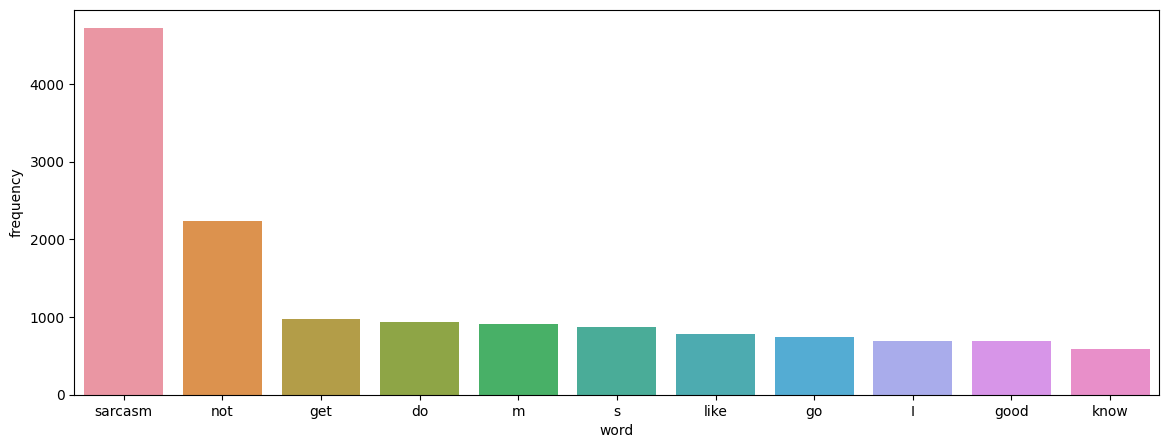

In [ ]:
temp=word_freq_df.head(11)
plt.figure(figsize=(14,5))
#temp= temp.to_frame().reset_index()
sns.barplot(x="word",y="frequency", data = temp)
plt.show()

regular

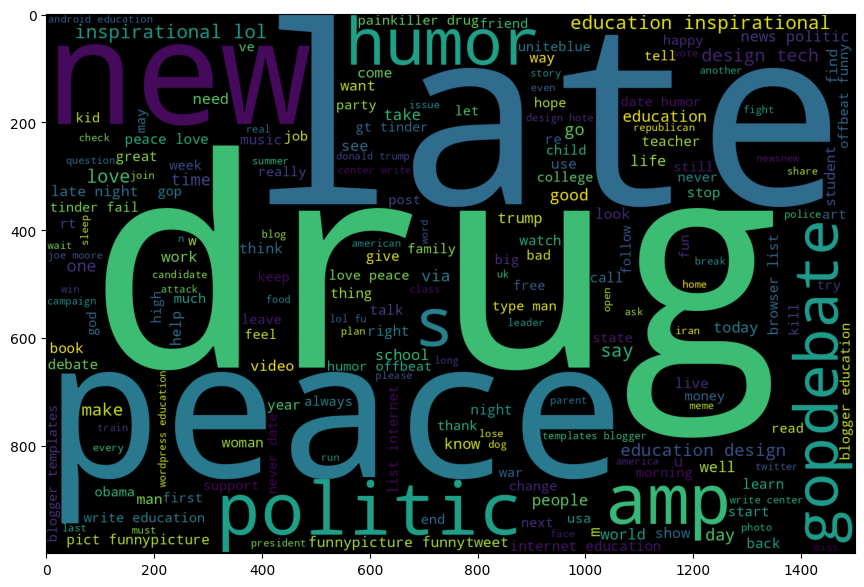

In [ ]:
all_tweet=''.join(data1['clean_tweets'][data1['class']=='regular'])
plt.figure(figsize=(12,7))
word_cloud=WordCloud(width=1500,height=1000).generate(all_tweet)
plt.imshow(word_cloud)
plt.show()

In [ ]:
word_freq1=pd.Series(''.join(data1['clean_tweets'][data1['class']=='regular']).split()).value_counts()[0:50]
word_freq_df=pd.DataFrame({'word':word_freq1.index,'frequency':word_freq1.values})
word_freq_df.head(10)

word  frequency
0      peace       2073
1  education       2026
2       drug       1943
3       late       1738
4      humor       1470
5       news       1459
6    politic       1052
7        not        895
8        amp        805
9  gopdebate        781

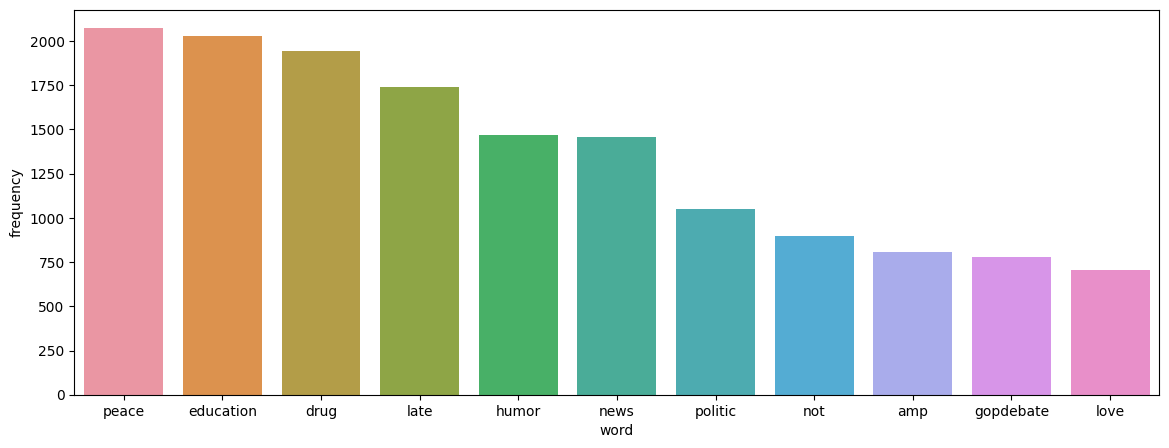

In [ ]:
temp=word_freq_df.head(11)
plt.figure(figsize=(14,5))
#temp= temp.to_frame().reset_index()
sns.barplot(x="word",y="frequency", data = temp)
plt.show()

In [ ]:
#data1.to_csv("after_lema_tweet.csv")

#sentiment analysis

In [ ]:
sentiment_df=pd.DataFrame()
sentiment_df['clean_tweet']=data1.clean_tweets
sentiment_df['class']=data1['class']
sentiment_df.head()

clean_tweet       class
0  aware dirty step get money staylight staywhite...  figurative
1     sarcasm people do not understand diy artattack  figurative
2  dailymail reader sensible always shock sarcast...  figurative
3                         get feel like game sarcasm  figurative
4                       probably miss text sarcastic  figurative

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia=SentimentIntensityAnalyzer()

def sentiment_analyse(txt):
  sent_scr=sia.polarity_scores(txt)
  if(sent_scr['compound']>0.5):
    return 'positive'
  elif (sent_scr['compound']<-0.5):
    return 'negative'
  else :
    return 'nutral'

sentiment_df['sentiment']=sentiment_df['clean_tweet'].apply(sentiment_analyse)
sentiment_df.head()


clean_tweet       class sentiment
0  aware dirty step get money staylight staywhite...  figurative  negative
1     sarcasm people do not understand diy artattack  figurative    nutral
2  dailymail reader sensible always shock sarcast...  figurative  negative
3                         get feel like game sarcasm  figurative    nutral
4                       probably miss text sarcastic  figurative    nutral

In [ ]:
sen=sentiment_df.groupby(['class','sentiment'])['sentiment'].count()
sen

class       sentiment
figurative  negative      2948
            nutral       14904
            positive      3383
irony       negative      1947
            nutral        9139
            positive      1703
regular     negative      1570
            nutral       11046
            positive      5953
sarcasm     negative      2109
            nutral       10302
            positive      2993
Name: sentiment, dtype: int64

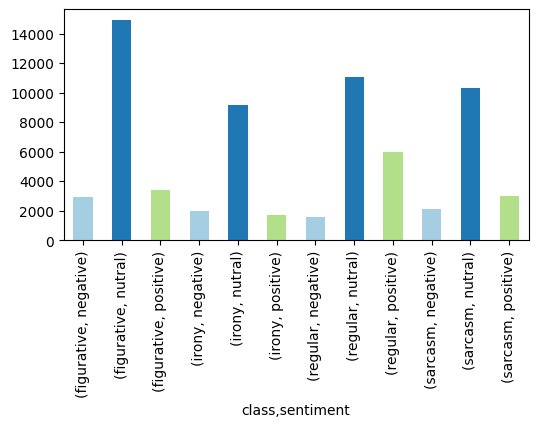

In [ ]:
#sen.plot(kind='bar',color=sns.color_palette("Set1"))
plt.figure(figsize=(6,3))
sen.plot(kind='bar',label='class',color=plt.cm.Paired(np.arange(3)))
plt.show()

In [ ]:
#try to plot using hue value

# N gram analysis

In [ ]:
#ngram and bi gram analysis
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()

In [ ]:
#n gram analysis
tweet_fig=sentiment_df[sentiment_df['class']=='figurative']['clean_tweet']
cnt_vect_fig=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 650)
X=cnt_vect_fig.fit_transform(tweet_fig)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cnt_vect_fig.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1] ,reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
#wd_df.to_csv("figurative_ngram_cntvect.csv")
wd_df.head(10)

word  count
0  sarcasm  10213
1    irony   7979
2   ironic   2904
3      not   2885
4       do   1519
5      get   1486
6   do not   1372
7       go   1042
8     like   1008
9   people    986

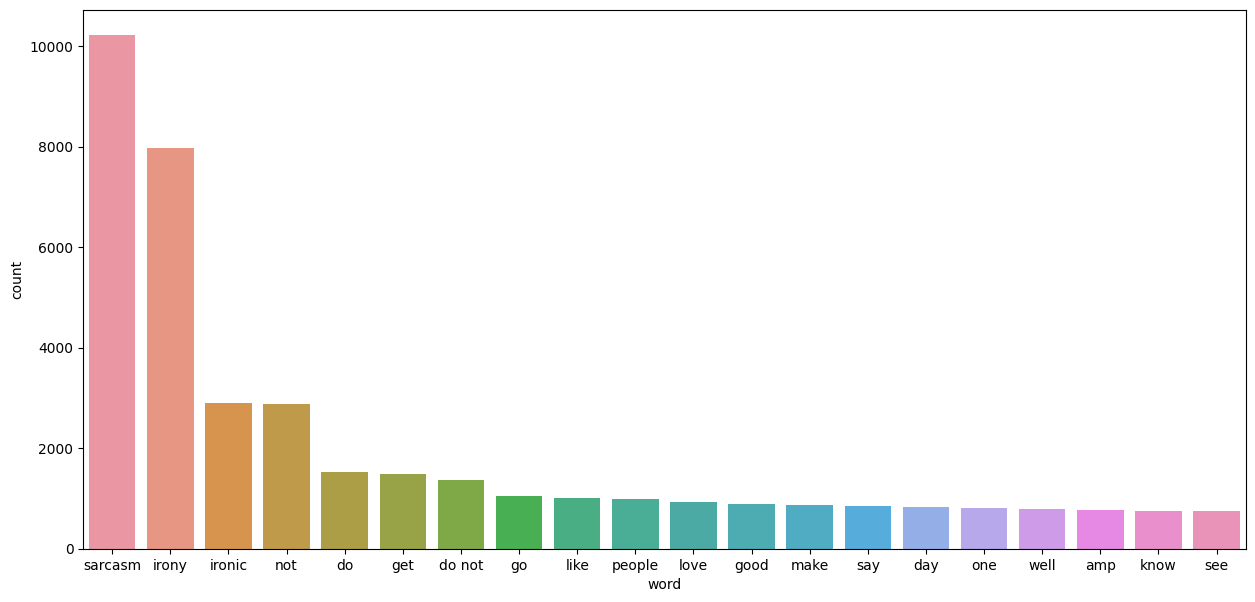

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="word",y="count", data = wd_df.iloc[:20])
plt.show()

In [ ]:
print(cnt_vect_fig.get_feature_names_out())

['10' '12' '1st' '20' 'able' 'absolutely' 'account' 'act' 'actually' 'ad'
 'add' 'ago' 'agree' 'allow' 'almost' 'already' 'also' 'always' 'amazing'
 'america' 'american' 'amp' 'another' 'answer' 'anyone' 'anything' 'app'
 'apparently' 'apple' 'appreciate' 'around' 'art' 'article' 'ask' 'ass'
 'attack' 'away' 'awesome' 'awesome sarcasm' 'baby' 'back' 'bad' 'ball'
 'ban' 'base' 'bb17' 'bc' 'be' 'be not' 'bear' 'beat' 'beautiful' 'become'
 'bed' 'behind' 'believe' 'bet' 'big' 'bill' 'birthday' 'bit' 'bitch'
 'black' 'blame' 'block' 'blue' 'book' 'boy' 'break' 'bring' 'build' 'bus'
 'business' 'buy' 'call' 'can' 'can not' 'can not wait' 'candidate' 'car'
 'card' 'care' 'case' 'catch' 'cause' 'chance' 'change' 'character'
 'charge' 'cheat' 'check' 'child' 'church' 'city' 'claim' 'class' 'clean'
 'clearly' 'close' 'coach' 'coffee' 'college' 'come' 'comment'
 'commercial' 'company' 'complain' 'control' 'cool' 'could' 'could not'
 'country' 'course' 'cover' 'crazy' 'create' 'cry' 'customer' 'c

In [ ]:
#n gram analysis
#sarcasm
tweet_sar=sentiment_df[sentiment_df['class']=='sarcasm']['clean_tweet']
cnt_vect_sar=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 650)
X=cnt_vect_sar.fit_transform(tweet_sar)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cnt_vect_sar.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1] ,reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
#wd_df.to_csv("sarcasm_ngram_cntvect.csv")
wd_df.head(10)

word  count
0    sarcasm  14743
1        not   2248
2         do   1185
3        get   1123
4     do not   1069
5       love    952
6  sarcastic    926
7       good    904
8       like    850
9         go    825

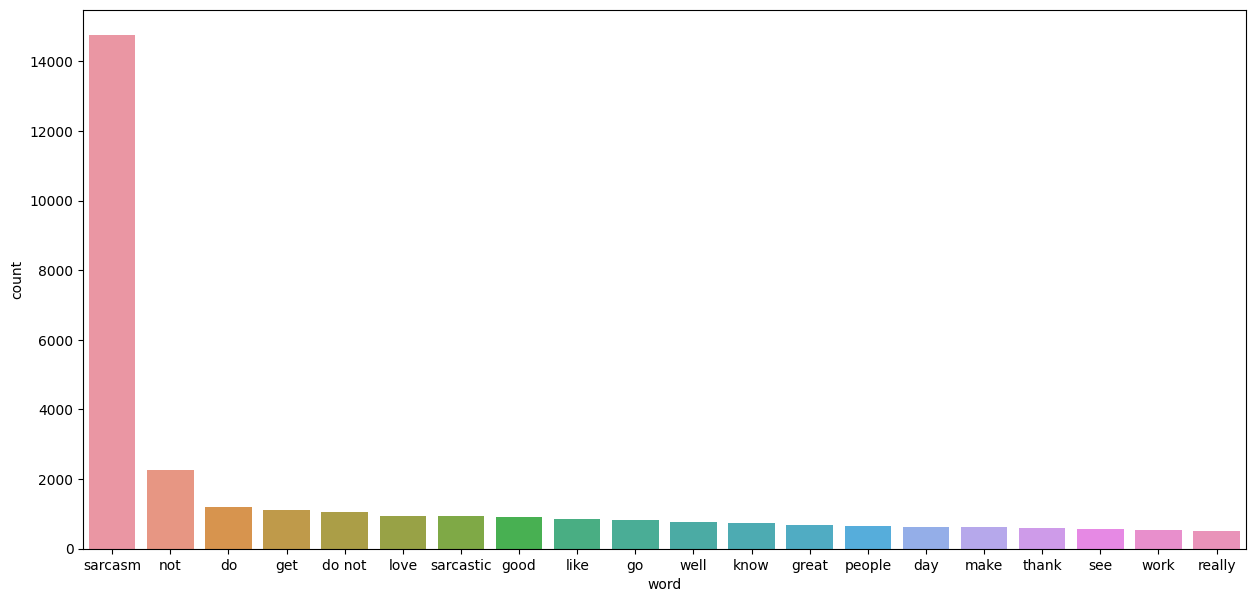

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="word",y="count", data = wd_df.iloc[:20])
plt.show()

In [ ]:
print(cnt_vect_sar.get_feature_names_out())

['10' '100' '12' '15' '20' 'able' 'absolutely' 'account' 'act' 'actually'
 'add' 'ago' 'agree' 'ah' 'ahead' 'air' 'allow' 'almost' 'already' 'also'
 'always' 'am' 'amazing' 'america' 'amp' 'another' 'answer' 'anyone'
 'anything' 'apparently' 'appreciate' 'around' 'ask' 'ass' 'away'
 'awesome' 'awesome sarcasm' 'baby' 'back' 'back sarcasm' 'bad' 'ball'
 'ban' 'base' 'baseball' 'bb17' 'bc' 'be' 'be not' 'beat' 'beautiful'
 'become' 'believe' 'bet' 'big' 'bill' 'birthday' 'bit' 'bitch' 'black'
 'blame' 'book' 'boy' 'brady' 'brain' 'break' 'brilliant' 'bring' 'bus'
 'business' 'buy' 'call' 'can' 'can not' 'can not believe' 'can not wait'
 'car' 'care' 'case' 'catch' 'cause' 'cdnpoli' 'change' 'check' 'child'
 'city' 'class' 'clearly' 'close' 'coffee' 'cold' 'college' 'come'
 'come sarcasm' 'comment' 'cool' 'cop' 'could' 'could not' 'country'
 'course' 'cover' 'creative' 'creativity' 'customer' 'customer service'
 'cut' 'dad' 'damn' 'dare' 'day' 'day sarcasm' 'dead' 'deal' 'dear'
 'debate' 

In [ ]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#irony
tweet_irony=sentiment_df[sentiment_df['class']=='irony']['clean_tweet']
cnt_vect_irony=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 650)
X=cnt_vect_irony.fit_transform(tweet_irony)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cnt_vect_irony.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1] ,reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df.to_csv("irony_ngram_cntvect.csv")
wd_df.head(10)

word  count
0   irony   9972
1  ironic   3212
2     not   1551
3     get    858
4      do    772
5  do not    722
6  people    706
7     say    664
8     amp    625
9      go    566

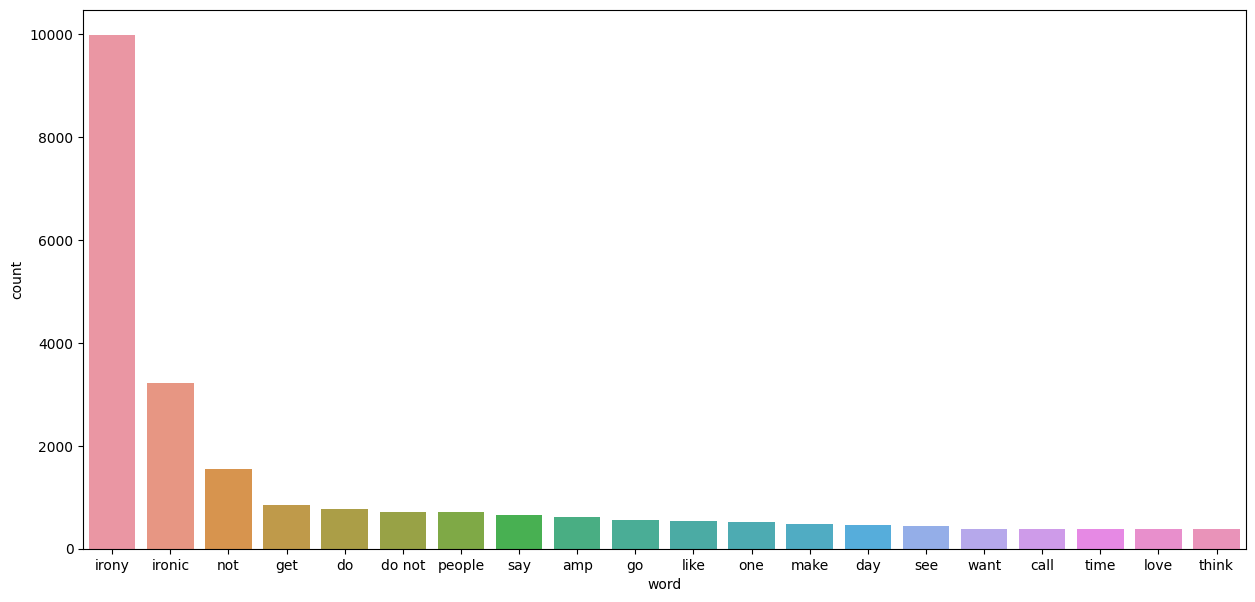

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="word",y="count", data = wd_df.iloc[:20])
plt.show()

In [ ]:
print(cnt_vect_irony.get_feature_names_out())

['10' '1st' '20' 'able' 'account' 'accuse' 'act' 'actually' 'ad' 'add'
 'advice' 'ago' 'agree' 'alanis' 'allow' 'almost' 'already' 'also'
 'always' 'amazing' 'america' 'american' 'americans' 'amp' 'animal'
 'another' 'answer' 'anyone' 'anyone else' 'anything' 'app' 'apparently'
 'apple' 'around' 'art' 'article' 'ask' 'attack' 'attention' 'auspol'
 'away' 'back' 'bad' 'ball' 'ban' 'bar' 'base' 'bb17' 'bc' 'be' 'be not'
 'bear' 'beat' 'beautiful' 'become' 'bed' 'behind' 'believe' 'big' 'bill'
 'birthday' 'bit' 'bitch' 'black' 'blame' 'block' 'blue' 'body' 'book'
 'boy' 'break' 'bring' 'build' 'business' 'buy' 'call' 'campaign' 'can'
 'can not' 'candidate' 'car' 'card' 'care' 'case' 'catch' 'cause'
 'celebrate' 'change' 'character' 'charge' 'cheat' 'check' 'child'
 'choose' 'christian' 'church' 'city' 'claim' 'class' 'clean' 'close'
 'coffee' 'college' 'come' 'comment' 'commercial' 'company' 'complain'
 'conservative' 'consider' 'cool' 'cop' 'corbyn' 'could' 'could not'
 'country' 'course

In [ ]:
#regular
tweet_regular=sentiment_df[sentiment_df['class']=='regular']['clean_tweet']
cnt_vect_reg=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 650)
X=cnt_vect_reg.fit_transform(tweet_regular)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cnt_vect_reg.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1] ,reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df.to_csv("regular_ngram_cntvect.csv")
wd_df.head(10)

word  count
0      peace   2961
1       news   2933
2       late   2864
3  education   2760
4       drug   2700
5      humor   2579
6    politic   2310
7  gopdebate   1441
8        not    899
9       love    870

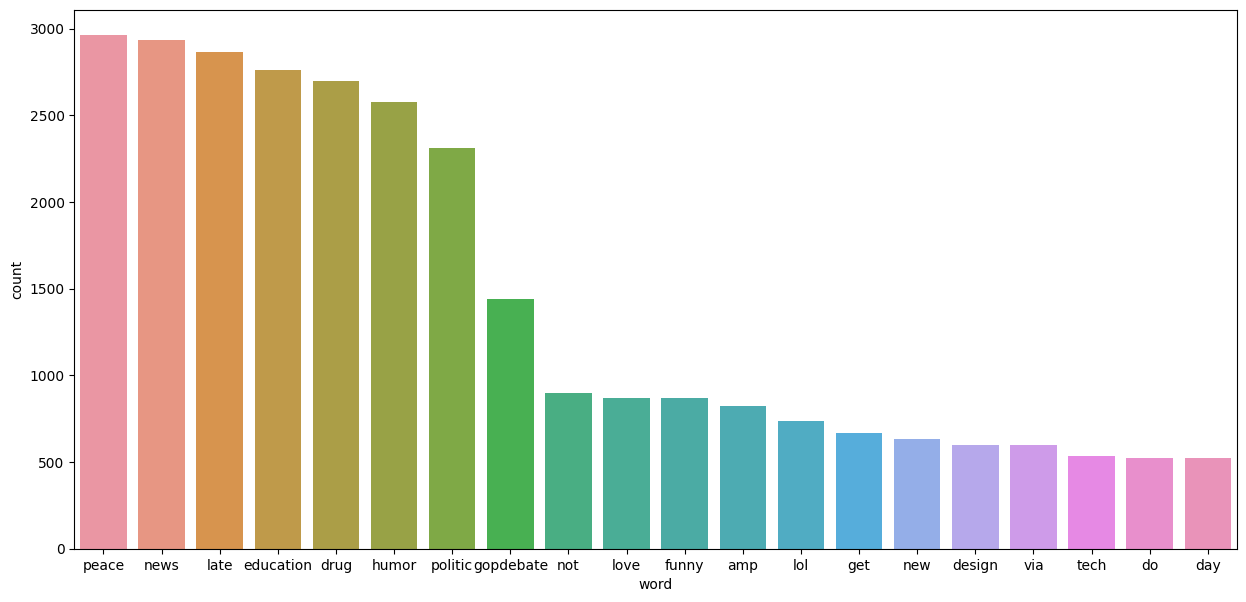

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="word",y="count", data = wd_df.iloc[:20])
plt.show()

In [ ]:
print(cnt_vect_reg.get_feature_names_out())

['10' '10 type' '10 type man' '15' '20' '2015' '2016' 'addiction'
 'alcohol' 'already' 'always' 'america' 'american' 'amp' 'android'
 'android design' 'android design android' 'android education'
 'android education design' 'animal' 'another' 'app' 'apple' 'around'
 'arrest' 'art' 'ask' 'attack' 'australia' 'away' 'baby' 'back' 'bad'
 'bbc' 'be' 'be not' 'beautiful' 'become' 'believe' 'biden' 'big' 'bill'
 'birthday' 'black' 'blog' 'blogger' 'blogger education'
 'blogger education inspirational' 'blogger templates'
 'blogger templates blogger' 'body' 'boehner' 'book' 'boy' 'break' 'bring'
 'browser' 'browser list' 'browser list internet' 'build' 'bus' 'bush'
 'business' 'business education' 'business education design' 'california'
 'call' 'campaign' 'can' 'can not' 'canada' 'cancer' 'candidate' 'car'
 'care' 'carson' 'cartoon' 'case' 'cat' 'catch' 'cause' 'ccot' 'center'
 'center write' 'center write education' 'change' 'charge' 'check' 'child'
 'china' 'christian' 'city' 'class' 'clin

#TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [ ]:
#figurative
tfidf_fig=TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 1000)
X=tfidf_fig.fit_transform(tweet_fig)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in tfidf_fig.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1] ,reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','weight']
wd_df.to_csv("figurative_ngram_tfidf.csv")
wd_df.head(10)

word       weight
0  sarcasm  1680.820350
1    irony  1469.233644
2   ironic   774.145230
3      not   560.476741
4      get   391.942685
5       do   363.366404
6   do not   329.039052
7     love   313.085346
8       go   303.870558
9     like   296.378055

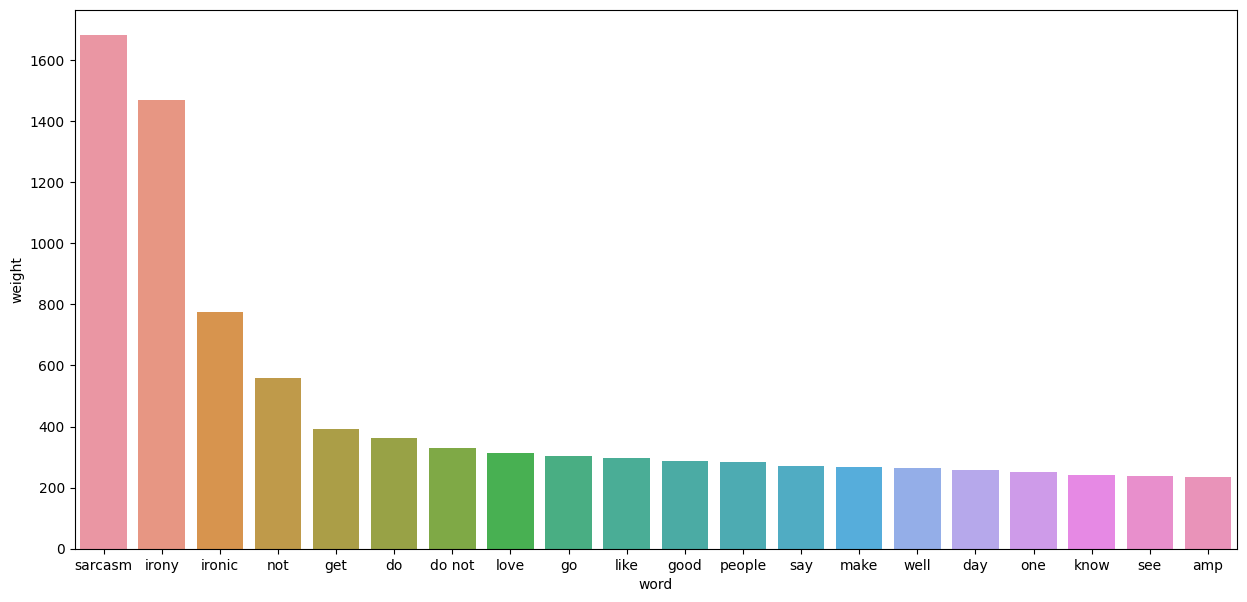

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="word",y="weight", data = wd_df.iloc[:20])
plt.show()

In [ ]:
print(tfidf_fig.get_feature_names_out())

['10' '100' '12' '15' '1st' '20' '2nd' '30' '3rd' '50' 'able' 'absolutely'
 'abuse' 'accept' 'accord' 'account' 'accuse' 'act' 'actually' 'ad' 'add'
 'advice' 'ago' 'agree' 'air' 'airport' 'alanis' 'alarm' 'all' 'allow'
 'almost' 'already' 'also' 'always' 'am' 'amazing' 'america' 'american'
 'americans' 'amp' 'animal' 'another' 'answer' 'anymore' 'anyone'
 'anyone else' 'anything' 'anyway' 'app' 'apparently' 'apple' 'appreciate'
 'argument' 'around' 'arrest' 'art' 'article' 'ask' 'ass' 'attack'
 'attention' 'auspol' 'avoid' 'award' 'away' 'awesome' 'awesome sarcasm'
 'baby' 'back' 'bad' 'bag' 'ball' 'ban' 'bank' 'bar' 'base' 'bb17' 'bc'
 'be' 'be not' 'be not ironic' 'bear' 'beat' 'beautiful' 'become' 'bed'
 'begin' 'behind' 'believe' 'bet' 'big' 'bill' 'birthday' 'bit' 'bitch'
 'black' 'blame' 'blind' 'block' 'blow' 'blue' 'board' 'body' 'bomb'
 'book' 'box' 'boy' 'brain' 'break' 'brilliant' 'bring' 'british' 'brown'
 'build' 'burn' 'bus' 'business' 'busy' 'buy' 'call' 'campaign' 'can

In [ ]:
#irony
tfidf_irony=TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 650)
X=tfidf_irony.fit_transform(tweet_irony)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in tfidf_irony.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1] ,reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','weight']
wd_df.to_csv("irony_ngram_tfidf.csv")
wd_df.head(10)

word       weight
0   irony  1490.212240
1  ironic   791.716376
2     not   336.371068
3     get   264.817553
4     say   223.859599
5  people   217.018917
6      do   206.170263
7     amp   201.761730
8  do not   193.847283
9    like   183.898255

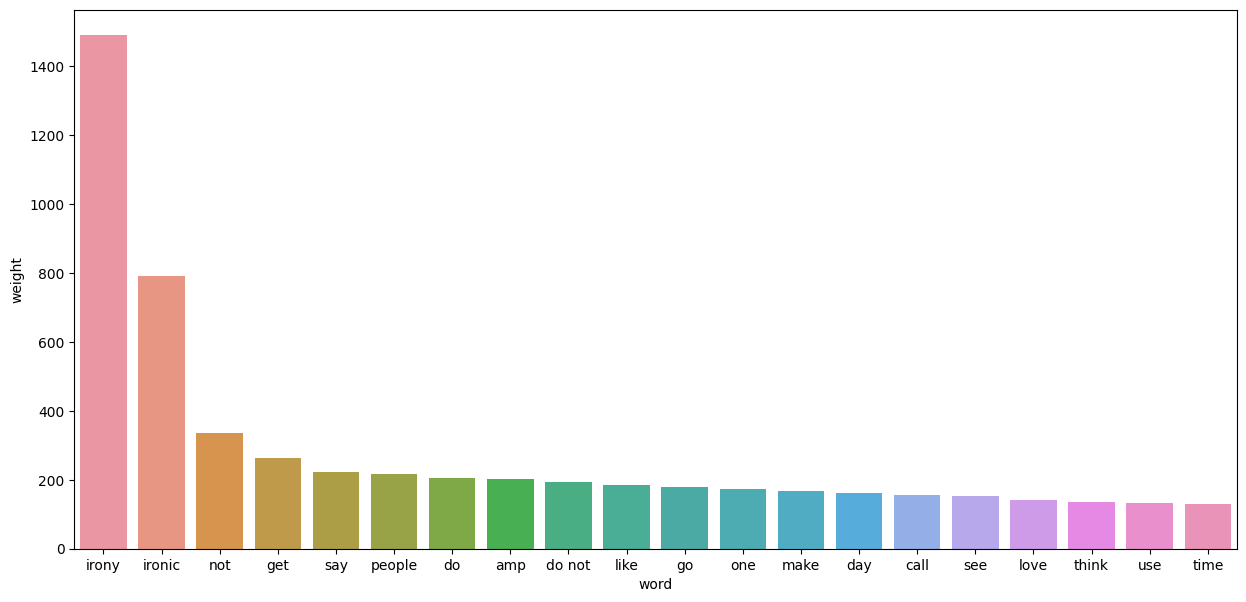

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="word",y="weight", data = wd_df.iloc[:20])
plt.show()

In [ ]:
print(tfidf_irony.get_feature_names_out())

['10' '1st' '20' 'able' 'account' 'accuse' 'act' 'actually' 'ad' 'add'
 'advice' 'ago' 'agree' 'alanis' 'allow' 'almost' 'already' 'also'
 'always' 'amazing' 'america' 'american' 'americans' 'amp' 'animal'
 'another' 'answer' 'anyone' 'anyone else' 'anything' 'app' 'apparently'
 'apple' 'around' 'art' 'article' 'ask' 'attack' 'attention' 'auspol'
 'away' 'back' 'bad' 'ball' 'ban' 'bar' 'base' 'bb17' 'bc' 'be' 'be not'
 'bear' 'beat' 'beautiful' 'become' 'bed' 'behind' 'believe' 'big' 'bill'
 'birthday' 'bit' 'bitch' 'black' 'blame' 'block' 'blue' 'body' 'book'
 'boy' 'break' 'bring' 'build' 'business' 'buy' 'call' 'campaign' 'can'
 'can not' 'candidate' 'car' 'card' 'care' 'case' 'catch' 'cause'
 'celebrate' 'change' 'character' 'charge' 'cheat' 'check' 'child'
 'choose' 'christian' 'church' 'city' 'claim' 'class' 'clean' 'close'
 'coffee' 'college' 'come' 'comment' 'commercial' 'company' 'complain'
 'conservative' 'consider' 'cool' 'cop' 'corbyn' 'could' 'could not'
 'country' 'course

In [ ]:
#sarcasm
tfidf_sar=TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 650)
X=tfidf_sar.fit_transform(tweet_sar)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in tfidf_sar.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1] ,reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','weight']
wd_df.to_csv("sarcasm_ngram_tfidf.csv")
wd_df.head(10)

word       weight
0    sarcasm  1846.055151
1        not   473.208544
2  sarcastic   341.805812
3       love   335.917261
4        get   325.743567
5         do   306.674979
6       good   296.397191
7     do not   280.820840
8       well   262.456035
9       like   261.966444

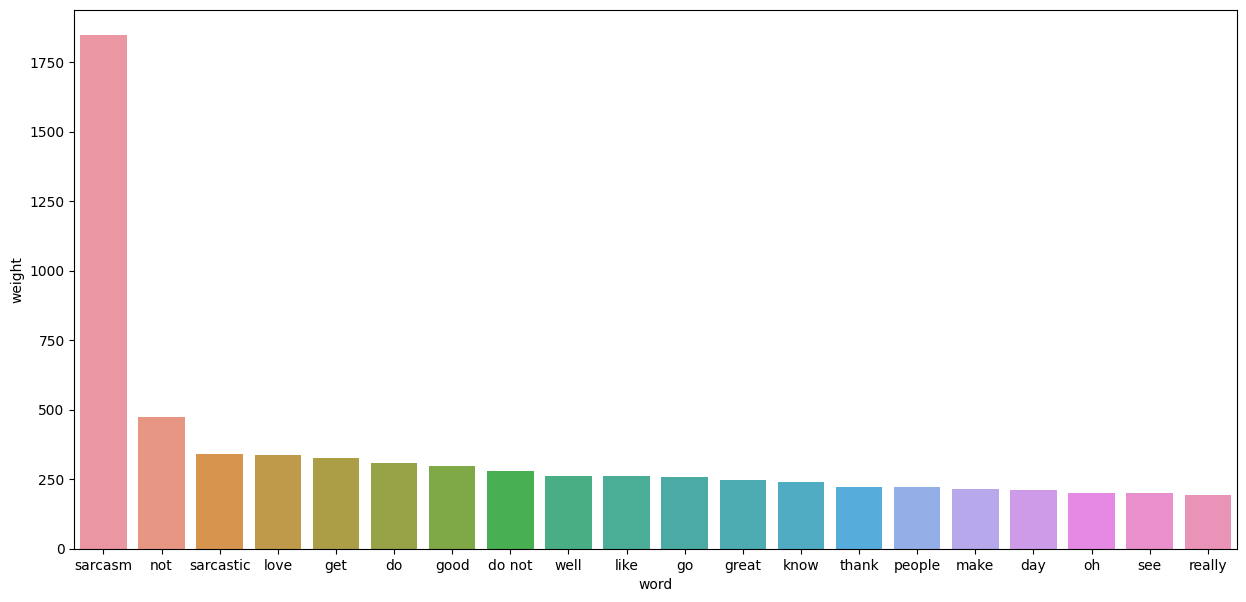

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="word",y="weight", data = wd_df.iloc[:20])
plt.show()

In [ ]:
print(tfidf_sar.get_feature_names_out())

['10' '100' '12' '15' '20' 'able' 'absolutely' 'account' 'act' 'actually'
 'add' 'ago' 'agree' 'ah' 'ahead' 'air' 'allow' 'almost' 'already' 'also'
 'always' 'am' 'amazing' 'america' 'amp' 'another' 'answer' 'anyone'
 'anything' 'apparently' 'appreciate' 'around' 'ask' 'ass' 'away'
 'awesome' 'awesome sarcasm' 'baby' 'back' 'back sarcasm' 'bad' 'ball'
 'ban' 'base' 'baseball' 'bb17' 'bc' 'be' 'be not' 'beat' 'beautiful'
 'become' 'believe' 'bet' 'big' 'bill' 'birthday' 'bit' 'bitch' 'black'
 'blame' 'book' 'boy' 'brady' 'brain' 'break' 'brilliant' 'bring' 'bus'
 'business' 'buy' 'call' 'can' 'can not' 'can not believe' 'can not wait'
 'car' 'care' 'case' 'catch' 'cause' 'cdnpoli' 'change' 'check' 'child'
 'city' 'class' 'clearly' 'close' 'coffee' 'cold' 'college' 'come'
 'come sarcasm' 'comment' 'cool' 'cop' 'could' 'could not' 'country'
 'course' 'cover' 'creative' 'creativity' 'customer' 'customer service'
 'cut' 'dad' 'damn' 'dare' 'day' 'day sarcasm' 'dead' 'deal' 'dear'
 'debate' 

In [ ]:
#regular
tfidf_reg=TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 650)
X=tfidf_reg.fit_transform(tweet_regular)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in tfidf_reg.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1] ,reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','weight']
wd_df.to_csv("regular_ngram_tfidf.csv")
wd_df.head(10)

word      weight
0       late  961.088139
1      peace  903.515707
2       news  867.502717
3       drug  841.984502
4      humor  763.965295
5  education  719.835090
6    politic  669.864935
7  gopdebate  479.661797
8       love  303.675404
9        amp  288.076074

In [ ]:
print(tfidf_reg.get_feature_names_out())

['10' '10 type' '10 type man' '15' '20' '2015' '2016' 'addiction'
 'alcohol' 'already' 'always' 'america' 'american' 'amp' 'android'
 'android design' 'android design android' 'android education'
 'android education design' 'animal' 'another' 'app' 'apple' 'around'
 'arrest' 'art' 'ask' 'attack' 'australia' 'away' 'baby' 'back' 'bad'
 'bbc' 'be' 'be not' 'beautiful' 'become' 'believe' 'biden' 'big' 'bill'
 'birthday' 'black' 'blog' 'blogger' 'blogger education'
 'blogger education inspirational' 'blogger templates'
 'blogger templates blogger' 'body' 'boehner' 'book' 'boy' 'break' 'bring'
 'browser' 'browser list' 'browser list internet' 'build' 'bus' 'bush'
 'business' 'business education' 'business education design' 'california'
 'call' 'campaign' 'can' 'can not' 'canada' 'cancer' 'candidate' 'car'
 'care' 'carson' 'cartoon' 'case' 'cat' 'catch' 'cause' 'ccot' 'center'
 'center write' 'center write education' 'change' 'charge' 'check' 'child'
 'china' 'christian' 'city' 'class' 'clin

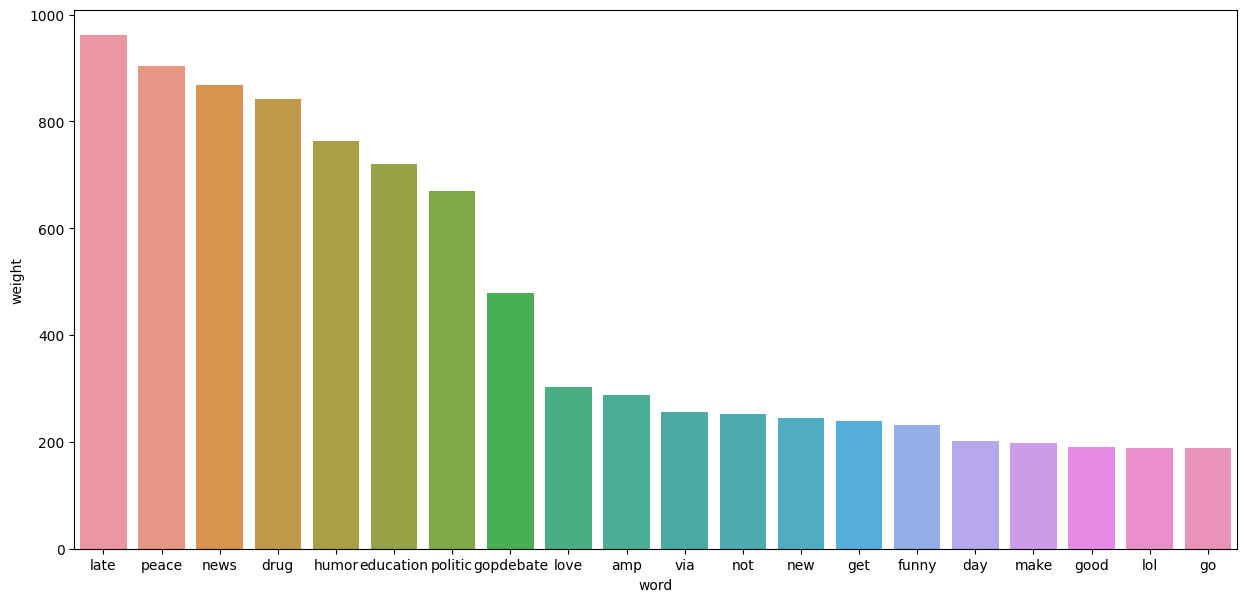

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="word",y="weight", data = wd_df.iloc[:20])
plt.show()

In [ ]:
#irony
tweet_all=sentiment_df['clean_tweet']
tfidf_all=TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 650)
X=tfidf_all.fit_transform(tweet_all)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in tfidf_all.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1] ,reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','weight']
wd_df.to_csv("all_ngram_tfidf.csv")
wd_df.head(10)

word       weight
0  sarcasm  5292.635367
1    irony  4442.063417
2   ironic  2024.257964
3      not  1703.922601
4      get  1264.842017
5     news  1252.994983
6     late  1225.418611
7    peace  1198.072226
8     drug  1149.473920
9     love  1124.255403

In [ ]:
wd_df.to_csv("all_ngram_tfidf.csv")

Model Builing

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB as MB

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tweet_all=sentiment_df['clean_tweet']
tweet_all

0        aware dirty step get money staylight staywhite...
1           sarcasm people do not understand diy artattack
2        dailymail reader sensible always shock sarcast...
3                               get feel like game sarcasm
4                             probably miss text sarcastic
                               ...                        
67992    photo image via heart childhood cool funny sar...
67993    never knewi well put universe lolmaybe there s...
67994    hey want say thank puberty let apart itty bitt...
67995    I m sure coverage like fox news special " the ...
67996                   u13 will not believe see p sarcasm
Name: clean_tweet, Length: 67997, dtype: object

In [ ]:
tfidf_reg=TfidfVectorizer(stop_words='english',norm="l2",analyzer='word',ngram_range=(1,4), max_features = 5000)
X=tfidf_reg.fit_transform(tweet_all)
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#from count vectoriser
count_vectorizer = CountVectorizer(ngram_range=(1,3),max_features=3000)
cnt_vect_fig=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 1650)
X=cnt_vect_fig.fit_transform(tweet_all)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
label_encoder = preprocessing.LabelEncoder()
sentiment_df['class_lle_encode']= label_encoder.fit_transform(sentiment_df['class'])
y=sentiment_df['class_lle_encode']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=43)

In [ ]:
abc = AdaBoostClassifier(n_estimators=40,learning_rate=0.002)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

print("test_score",metrics.accuracy_score(y_pred,y_test))
y_pred = model.predict(x_train)
print("train score",metrics.accuracy_score(y_pred,y_train))



test_score 0.6328676470588235
train score 0.6314502638013125


In [ ]:
#naiveBayes

# Multinomial Naive Bayes
classifier_mb = MB(alpha=0.1, force_alpha=True)
model_nb=classifier_mb.fit(x_train, y_train)
y_pred_train=model_nb.predict(x_train)
y_pred_test=model_nb.predict(x_test)
print("train_score",metrics.accuracy_score(y_pred_train,y_train))
print("test_score",metrics.accuracy_score(y_pred_test,y_test))


train_score 0.67992720186775
test_score 0.6478676470588235


In [ ]:
model = XGBClassifier(n_estimators=1000,max_depth=3, max_leaves=10, learning_rate=0.001)
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
print("train_score",metrics.accuracy_score(y_pred_train,y_train))
print("test_score",metrics.accuracy_score(y_pred_test,y_test))

train_score 0.6777763479603655
test_score 0.6750735294117647


In [ ]:
model = XGBClassifier(n_estimators=1000,max_depth=7, max_leaves=10, learning_rate=0.01)
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
print("train_score",metrics.accuracy_score(y_pred_train,y_train))
print("test_score",metrics.accuracy_score(y_pred_test,y_test))

train_score 0.7082743533650753
test_score 0.6854411764705882


In [ ]:
model_xg = XGBClassifier(n_estimators=500,max_depth=3,gamma=2, max_leaves=10, learning_rate=0.01)
model_xg.fit(x_train, y_train)
y_pred_train=model_xg.predict(x_train)
y_pred_test=model_xg.predict(x_test)
print("train_score",metrics.accuracy_score(y_pred_train,y_train))
print("test_score",metrics.accuracy_score(y_pred_test,y_test))

train_score 0.6897623030681839
test_score 0.6868382352941177


In [ ]:
print(metrics.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.77      0.01      0.02     16988
           1       0.55      1.00      0.71     10231
           2       1.00      1.00      1.00     14855
           3       0.59      1.00      0.74     12323

    accuracy                           0.69     54397
   macro avg       0.73      0.75      0.62     54397
weighted avg       0.75      0.69      0.58     54397



In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier( num_leaves=10, max_depth=3, learning_rate=0.001, n_estimators=1000)
model.fit(x_train.astype('float32'), y_train.astype('float32'))
y_pred_train=model.predict(x_train.astype('float32'))
y_pred_test=model.predict(x_test.astype('float32'))
print("train_score",metrics.accuracy_score(y_pred_train,y_train))
print("test_score",metrics.accuracy_score(y_pred_test,y_test))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.548401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4759
[LightGBM] [Info] Number of data points in the train set: 54397, number of used features: 1650
[LightGBM] [Info] Start training from score -1.163802
[LightGBM] [Info] Start training from score -1.670887
[LightGBM] [Info] Start training from score -1.297972
[LightGBM] [Info] Start training from score -1.484842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [ ]:
#logistic reression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
y_pred_train=lgr.predict(x_train)
y_pred_test=lgr.predict(x_test)
print("train_score",metrics.accuracy_score(y_pred_train,y_train))
print("test_score",metrics.accuracy_score(y_pred_test,y_test))


train_score 0.7248010000551501
test_score 0.6643382352941176


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
rf = RandomForestClassifier(n_estimators= 1000, max_depth=10, min_samples_split= 4, max_features= 1500)
rf.fit(x_train,y_train)
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)
print("train_score",metrics.accuracy_score(y_pred_train,y_train))
print("test_score",metrics.accuracy_score(y_pred_test,y_test))

train_score 0.7008107064727834
test_score 0.6885294117647058


In [ ]:
dt1 = DecisionTreeClassifier()
dt1.fit(x_train,y_train)
y_pred_train=dt1.predict(x_train)
y_pred_test=dt1.predict(x_test)
print("train_score",metrics.accuracy_score(y_pred_train,y_train))
print("test_score",metrics.accuracy_score(y_pred_test,y_test))

train_score 0.9833079030093571
test_score 0.6495588235294117


In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train,y_train)
y_pred_train=knn1.predict(x_train)
y_pred_test=knn1.predict(x_test)
print("train_score",metrics.accuracy_score(y_pred_train,y_train))
print("test_score",metrics.accuracy_score(y_pred_test,y_test))

train_score 0.7644723054580216
test_score 0.6408088235294118


In [ ]:
sentiment_df['y_hat_pred']=model_xg.predict(X)

In [ ]:
sentiment_df['class'].value_counts()

figurative    21235
regular       18569
sarcasm       15404
irony         12789
Name: class, dtype: int64

In [ ]:
sentiment_df['class_lle_encode'].value_counts()

0    21235
2    18569
3    15404
1    12789
Name: class_lle_encode, dtype: int64

In [ ]:
sentiment_df.to_csv("twt_classs_nlp.csv")

#try removing less frequen